# Titanic survival classification problem

## DL model

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn.model_selection
from keras import regularizers
from keras.layers import Input, Dense, Dropout
from keras.models import Model, load_model
from keras.optimizers import Adam
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, accuracy_score,recall_score, auc, confusion_matrix
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [2]:
# data load
dataset = sns.load_dataset("titanic")
dataframe, test_dataframe = sklearn.model_selection.train_test_split(dataset, train_size=0.7, random_state=1)
dataframe.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
114,0,3,female,17.0,0,0,14.4583,C,Third,woman,False,NaN,Cherbourg,no,True
874,1,2,female,28.0,1,0,24.0000,C,Second,woman,False,NaN,Cherbourg,yes,False
76,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
876,0,3,male,20.0,0,0,9.8458,S,Third,man,True,NaN,Southampton,no,True
674,0,2,male,NaN,0,0,0.0000,S,Second,man,True,NaN,Southampton,no,True


In [3]:
print(dataframe['deck'].dtypes)
dataframe = dataframe.astype({"deck": str})
test_dataframe = test_dataframe.astype({"deck": str})
print(dataframe['deck'].dtypes)

category
object


In [4]:
# data processing
for i in dataframe.index:
    if dataframe['deck'][i] == 'nan':
        dataframe['deck'][i] = 'Z'

for i in test_dataframe.index:
    if test_dataframe['deck'][i] == 'nan':
        test_dataframe['deck'][i] = 'Z'

train_median = dataframe['age'].median()
for i in dataframe.index:
    if dataframe['age'][i] != dataframe['age'][i]:
        dataframe['age'][i] = train_median

train_median = test_dataframe['age'].median()
for i in test_dataframe.index:
    if test_dataframe['age'][i] != test_dataframe['age'][i]:
        test_dataframe['age'][i] = train_median

X = dataframe[['sex', 'pclass', 'age', 'deck']]
y = dataframe[['alive']]
X_ts = test_dataframe[['sex', 'pclass', 'age', 'deck']]
y_ts = test_dataframe[['alive']]
X_ts.head(10)

,sex,pclass,age,deck
862,female,1,48.0,D
223,male,3,28.0,Z
84,female,2,17.0,Z
680,female,3,28.0,Z
535,female,2,7.0,Z
623,male,3,21.0,Z
148,male,2,36.5,F
3,female,1,35.0,C
34,male,1,28.0,Z
241,female,3,28.0,Z


In [5]:
# normalization
normalization = [X['age'].mean(), X['age'].std()]
print("Age normalization --> " + str(normalization))

X['age'] = (X['age'] - normalization[0]) / normalization[1]
# age_sc = standard_scaler.fit_transform((X['Age']).values.reshape(-1,1))
X_ts['age'] = (X_ts['age'] - normalization[0]) / normalization[1]

X_dum = pd.get_dummies(X)
X_ts_dum = pd.get_dummies(X_ts)

Age normalization --> [29.81099518459069, 13.283963797935623]


In [6]:
# dummification
integer_encoded = label_encoder.fit_transform(y)
y = integer_encoded.reshape(len(integer_encoded), 1)

integer_encoded_ts = label_encoder.fit_transform(y_ts)
y_ts = integer_encoded_ts.reshape(len(integer_encoded_ts), 1)

In [7]:
reg = regularizers.l2(0.01)
opt = Adam(learning_rate=0.01)

# model definition
input = Input(len(X_dum.columns))
layer_1 = Dense(5, activation='relu')(input)
layer_2 = Dense(5, activation='relu')(layer_1)
output = Dense(1, activation='sigmoid')(layer_2)

model = Model(input, output)
model.compile(loss='binary_crossentropy',
          optimizer=opt,
          metrics=['accuracy'])
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 12)]              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 65        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [8]:
hist=model.fit(X_dum, 
               y,
               batch_size=64,
               epochs=8,
               validation_split=0.1,
               shuffle=True)

Epoch 1/8
9/9 [==============================] - 0s 11ms/step - loss: 0.6933 - accuracy: 0.6268 - val_loss: 0.6824 - val_accuracy: 0.7143
Epoch 2/8
9/9 [==============================] - 0s 2ms/step - loss: 0.6747 - accuracy: 0.6268 - val_loss: 0.6653 - val_accuracy: 0.7143
Epoch 3/8
9/9 [==============================] - 0s 2ms/step - loss: 0.6167 - accuracy: 0.6268 - val_loss: 0.5108 - val_accuracy: 0.7143
Epoch 4/8
9/9 [==============================] - 0s 2ms/step - loss: 0.5586 - accuracy: 0.6268 - val_loss: 0.4918 - val_accuracy: 0.7143
Epoch 5/8
9/9 [==============================] - 0s 2ms/step - loss: 0.5301 - accuracy: 0.6268 - val_loss: 0.5012 - val_accuracy: 0.7143
Epoch 6/8
9/9 [==============================] - 0s 2ms/step - loss: 0.5161 - accuracy: 0.6268 - val_loss: 0.4780 - val_accuracy: 0.7143
Epoch 7/8
9/9 [==============================] - 0s 2ms/step - loss: 0.5036 - accuracy: 0.6857 - val_loss: 0.4781 - val_accuracy: 0.7143
Epoch 8/8
9/9 [=========================

In [9]:
model.save("titanic_TransfLearn_model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: titanic_TransfLearn_model/assets


In [10]:
# hist.history.keys()
X_ts_dum.head()

,pclass,age,sex_female,sex_male,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_Z
862,1,1.369245,1,0,0,0,0,1,0,0,0,0
223,3,-0.136329,0,1,0,0,0,0,0,0,0,1
84,2,-0.964396,1,0,0,0,0,0,0,0,0,1
680,3,-0.136329,1,0,0,0,0,0,0,0,0,1
535,2,-1.717183,1,0,0,0,0,0,0,0,0,1


In [11]:
probabilities = model.predict(X_ts_dum)
fpr, tpr, _ = roc_curve(y_ts, probabilities)
print("Max ROC:")
print(auc(fpr, tpr))

predictions = np.where(probabilities > .5, 1, 0)
print("\nConfusion matrix:")
print(confusion_matrix(y_true=y_ts, y_pred=predictions))

Max ROC:
0.7869281045751634

Confusion matrix:
[[129  24]
 [ 38  77]]


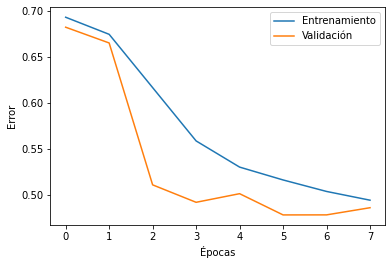

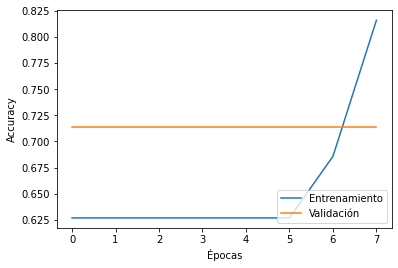

In [12]:
def plot_curves(history):
  plt.figure()
  plt.xlabel('Épocas')
  plt.ylabel('Error')
  plt.plot(history['loss'])
  plt.plot(history['val_loss'])
  plt.legend(['Entrenamiento', 'Validación'])

  plt.figure()
  plt.xlabel('Épocas')
  plt.ylabel('Accuracy')
  plt.plot(history['accuracy'])
  plt.plot(history['val_accuracy'])
  plt.legend(['Entrenamiento', 'Validación'], loc='lower right')

plot_curves(hist.history)

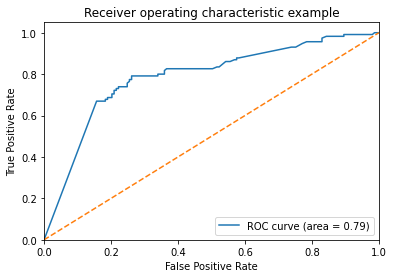

In [13]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Transfer Learning

In [14]:
# load model and split it
loaded_model = load_model("titanic_TransfLearn_model")
input_layer = loaded_model.layers[0]
output_layers = [layer for layer in loaded_model.layers[1:-1]]
models = [Model(inputs=input_layer.output, outputs=output_lay.output) for output_lay in output_layers]
features = [model.predict(X_dum) for model in models]

In [15]:
models[1].layers